In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model

In [133]:
def calc_lasso(X_train, Y_train,X_test, Y_test,alph):
    clf = linear_model.Lasso(alpha=alph)
    clf.fit(X_train, Y_train)
    r_test=clf.score(X_test, Y_test)
    r_train=clf.score(X_train, Y_train)
    return {'intercepto':clf.intercept_, 'coefs':clf.coef_, 'R_test':r_test,'R_train':r_train}

In [148]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
X=data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y=data['Balance']

#-----------------------------------------__
Norm = 0
quantity=10
alphas=2*np.logspace(1.0,3.0,num=quantity)
results = np.zeros([quantity,9])

if Norm==1:
    scalerx = preprocessing.StandardScaler().fit(X)
    X=scalerx.transform(X)
    devstd=np.std(Y)
    Y=Y-np.mean(Y)
    Y=Y/(devstd)
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
i=0
for al in alphas:
    res = calc_lasso(X_train, Y_train,X_test, Y_test,al)
    results[i,0] = res['intercepto']
    results[i,1:7] = res['coefs']
    results[i,7] = res['R_test']
    results[i,8] = res['R_train']
    i+=1


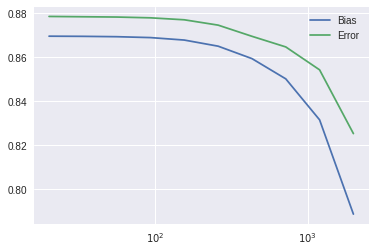

In [149]:
plt.semilogx(alphas,results[:,7],label='Bias')
plt.semilogx(alphas,results[:,8],label='Error')
plt.legend()